In [1]:
#importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, glob, path
from skimage.feature import hog
from sklearn.model_selection import train_test_split
import time

In [35]:
#reading the dataset
dataset = []
labels = []
main_dir = './Dataset/'
catagories = os.listdir(main_dir)
for catagory in catagories:
    path = os.path.join(main_dir, catagory)
    for image_path in os.listdir(path):
        full_path = os.path.join(path,image_path)
        image = cv2.imread(full_path, 0)
        resized = cv2.resize(image, (150,150))
        flatten = resized.flatten()
        dataset.append(flatten)
        lbl =catagories.index(catagory)
        labels.append(lbl)
        
X = np.array(dataset)
y = np.array(labels)
print(f'Shape of X:\n\t{X.shape}\nShape of y:\n\t{y.shape}')

Shape of X:
	(100, 22500)
Shape of y:
	(100,)


In [37]:
#splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'X_train shape:\n\t{X_train.shape}\nX_test shape:\n\t{X_test.shape}\ny_train shape:\n\t{y_train.shape}\ny_test shape:\n\t{y_test.shape}')

X_train shape:
	(80, 22500)
X_test shape:
	(20, 22500)
y_train shape:
	(80,)
y_test shape:
	(20,)


In [41]:
#fitting the classifier 'logistic regression'
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
st = time.time()
cls.fit(X=X_train, y=y_train)
print(time.time()-st)

1.6959946155548096


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
#testing the classifier
preds = cls.predict(X_test)
cls.score(X_test, y_test)
catagories[preds[0]]


'Cars'

In [42]:
#fitting the svm
from sklearn.svm import SVC
cls = SVC()
st = time.time()
cls.fit(X=X_train, y=y_train)
print(time.time()-st)

0.1749866008758545


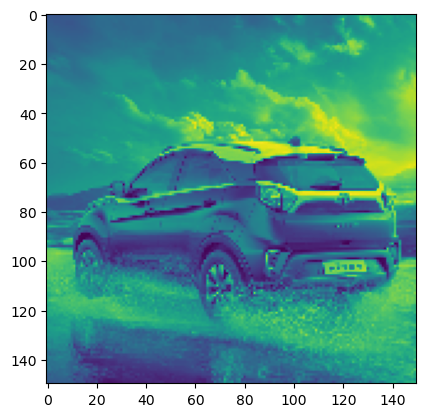

In [47]:
plt.imshow(X_test[0].reshape(150,150))